In [37]:
import tensorflow as tf
import keras
from keras.layers import Input, Dense, TimeDistributed, Dropout, Flatten
from keras.models import Model
from keras.optimizers import Adam
from sklearn.model_selection import train_test_split
import os
import h5py
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [85]:
f = h5py.File('processed-pythia82-lhc13-all-pt1-50k-r1_h022_e0175_t220_nonu_withPars_truth_0.z','r')
g = h5py.File('processed-pythia82-lhc13-all-pt1-50k-r1_h022_e0175_t220_nonu_withPars_truth_1.z','r')
h = h5py.File('processed-pythia82-lhc13-all-pt1-50k-r1_h022_e0175_t220_nonu_withPars_truth_2.z','r')
treeArray = f['t_allpar_new'][()]
treeArray2 = g['t_allpar_new'][()]
treeArray3 = g['t_allpar_new'][()]
features = ['j1_ptrel', 'j1_etarot', 'j1_phirot', 'j1_erel', 'j1_deltaR','j_index']
labels = ['j_g', 'j_q', 'j_w', 'j_z', 'j_t', 'j_index']


In [87]:
treeArray.shape

(5131613,)

In [107]:
features_df1 = pd.DataFrame(treeArray,columns=features)

In [108]:
features_df2 = pd.DataFrame(treeArray2,columns=features)

In [109]:
features_df3 = pd.DataFrame(treeArray3,columns=features)

In [110]:
features_df = pd.concat((features_df, features_df2,features_df3))

In [111]:
features_df = treearray4

In [112]:
index_df = features_df.groupby(['j_index'])

In [113]:
index_df.first()

,j1_ptrel,j1_etarot,j1_phirot,j1_erel,j1_deltaR
j_index,,,,,
1,0.526719,0.0,0.0,0.525633,0.024813
3,0.689462,0.0,0.0,0.699932,0.057165
7,0.390835,0.0,0.0,0.388123,0.079966
15,0.411910,0.0,0.0,0.410744,0.012951
19,0.086828,0.0,0.0,0.087459,0.009368
...,...,...,...,...,...
400199971,0.237410,0.0,0.0,0.224937,0.060514
400199975,0.149555,-0.0,0.0,0.146371,0.050620
400199976,0.199151,0.0,0.0,0.198536,0.064809


In [114]:
max_particles = 15

In [115]:
num_features = 5

In [116]:
data = np.zeros([197538,max_particles,num_features])
p = 0
for name, group in index_df:
    x = group.to_numpy()
    x = np.delete(x,5,1)

    g = 0
    for l in x:
        if g == max_particles or g == len(x): 
            break
        for n in range(num_features):
            data[p,g,n] = l[n]
        g = g+1

    p = p+1
    

In [118]:
labels_df1 = pd.DataFrame(treeArray,columns=labels)
labels_df2 = pd.DataFrame(treeArray2,columns=labels)
labels_df3 = pd.DataFrame(treeArray3,columns=labels)

In [ ]:
labels_df

In [119]:
labels_df = pd.concat((labels_df1, labels_df2,labels_df3))

In [120]:
labels_df = labels_df.groupby('j_index')

In [121]:
data

array([[[ 5.26718855e-01,  0.00000000e+00,  0.00000000e+00,
          5.25633097e-01,  2.48127822e-02],
        [ 8.16964805e-02, -1.00144953e-03,  4.55306284e-03,
          8.15227404e-02,  2.94277072e-02],
        [ 7.24203736e-02,  6.44924934e-04, -4.35186643e-03,
          7.22680390e-02,  2.04328783e-02],
        ...,
        [ 8.83336738e-03,  1.99425109e-02, -5.11611849e-02,
          8.85319710e-03,  3.21815610e-02],
        [ 8.69703293e-03, -5.29845506e-02, -2.65246987e-01,
          8.39474518e-03,  2.46873289e-01],
        [ 7.83436000e-03, -7.59458318e-02, -3.15579653e-01,
          7.49645615e-03,  3.01522911e-01]],

       [[ 6.89462423e-01,  0.00000000e+00,  0.00000000e+00,
          6.99931800e-01,  5.71646057e-02],
        [ 1.68542340e-01,  8.34689102e-14, -2.49775752e-01,
          1.59876242e-01,  1.94951132e-01],
        [ 2.03662720e-02, -1.29407674e-01, -6.19659433e-03,
          1.98702645e-02,  1.30197898e-01],
        ...,
        [ 5.46889193e-03, -2.0068781

In [122]:
labels_df.first()

,j_g,j_q,j_w,j_z,j_t
j_index,,,,,
1,1,0,0,0,0
3,1,0,0,0,0
7,1,0,0,0,0
15,1,0,0,0,0
19,1,0,0,0,0
...,...,...,...,...,...
400199971,0,0,0,0,1
400199975,0,0,0,0,1
400199976,0,0,0,0,1


In [123]:
labels = np.zeros([197538,5])
o = 0
for name,  group in labels_df:
    x = group.to_numpy()
    x = np.delete(x,5,1)
    for z in range(5):
        labels[o,z] = x[0][z]

    o = o+1

In [124]:
labels

array([[1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       ...,
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.]])

In [125]:
data

array([[[ 5.26718855e-01,  0.00000000e+00,  0.00000000e+00,
          5.25633097e-01,  2.48127822e-02],
        [ 8.16964805e-02, -1.00144953e-03,  4.55306284e-03,
          8.15227404e-02,  2.94277072e-02],
        [ 7.24203736e-02,  6.44924934e-04, -4.35186643e-03,
          7.22680390e-02,  2.04328783e-02],
        ...,
        [ 8.83336738e-03,  1.99425109e-02, -5.11611849e-02,
          8.85319710e-03,  3.21815610e-02],
        [ 8.69703293e-03, -5.29845506e-02, -2.65246987e-01,
          8.39474518e-03,  2.46873289e-01],
        [ 7.83436000e-03, -7.59458318e-02, -3.15579653e-01,
          7.49645615e-03,  3.01522911e-01]],

       [[ 6.89462423e-01,  0.00000000e+00,  0.00000000e+00,
          6.99931800e-01,  5.71646057e-02],
        [ 1.68542340e-01,  8.34689102e-14, -2.49775752e-01,
          1.59876242e-01,  1.94951132e-01],
        [ 2.03662720e-02, -1.29407674e-01, -6.19659433e-03,
          1.98702645e-02,  1.30197898e-01],
        ...,
        [ 5.46889193e-03, -2.0068781

In [126]:
def Pair_inputs(data, num_tracks_for_pairing = 15):
    """
        assuming data shape is: (batch, num_tracks, 13)
    
        returns:
        ---------
        (batch , num_tracks_for_pairing**2, 26)
    """

    # Example: input of shape (batch, 10 (const. #tracks), 13)
    # --> 100 pairs including (a,b), (b,a)
    # stacking the pairs' features together --> 2*13 features
    # will be re-permuted & duplicated into (batch, 100, 26)
    # [optional] transpose / reshape --> (batch * 100, 26)

    sp = data.shape
    
    num_feat = sp[2]
    assert data.ndim==3

    result = np.zeros((sp[0], num_tracks_for_pairing**2, num_feat*2),'float32')

    
    for i in range(num_tracks_for_pairing):
        result[:, i::num_tracks_for_pairing, :num_feat] = data
        result[:, i*num_tracks_for_pairing:num_tracks_for_pairing + i*num_tracks_for_pairing, num_feat:] = data

    return result


In [127]:
data.shape

(197538, 15, 5)

In [128]:
paired_inputs = Pair_inputs(data,15)

In [129]:
paired_inputs.shape

(197538, 225, 10)

In [130]:
paired_inputs[0]

array([[ 0.52671885,  0.        ,  0.        , ...,  0.        ,
         0.5256331 ,  0.02481278],
       [ 0.52671885,  0.        ,  0.        , ...,  0.00455306,
         0.08152274,  0.02942771],
       [ 0.52671885,  0.        ,  0.        , ..., -0.00435187,
         0.07226804,  0.02043288],
       ...,
       [ 0.00783436, -0.07594583, -0.31557965, ..., -0.05116118,
         0.0088532 ,  0.03218156],
       [ 0.00783436, -0.07594583, -0.31557965, ..., -0.265247  ,
         0.00839475,  0.24687329],
       [ 0.00783436, -0.07594583, -0.31557965, ..., -0.31557965,
         0.00749646,  0.3015229 ]], dtype=float32)

In [131]:
X_train, X_test, y_train, y_test = train_test_split(paired_inputs,labels,test_size = 0.2, random_state = 42)


In [132]:
np.max(y_train)

1.0

In [143]:
Inputs = Input(shape=(225,10))
x = TimeDistributed(Dense(32, activation='relu', kernel_initializer='lecun_uniform', name='fc1'))(Inputs)
x= Dropout(rate = 0.3)(x)
x=Flatten()(x)
x = Dense(16, activation='relu', kernel_initializer='lecun_uniform', name='fc7')(x)
x = Dropout(rate = 0.3)(x)
x = Dense(8, activation='relu', kernel_initializer='lecun_uniform', name='fc6')(x)

predictions = Dense(5, activation='softmax', kernel_initializer='lecun_uniform', name = 'output_softmax')(x)
model = Model(inputs=Inputs, outputs=predictions)
model.summary()

Model: "model_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_8 (InputLayer)         [(None, 225, 10)]         0         
_________________________________________________________________
time_distributed_7 (TimeDist (None, 225, 32)           352       
_________________________________________________________________
dropout_4 (Dropout)          (None, 225, 32)           0         
_________________________________________________________________
flatten_7 (Flatten)          (None, 7200)              0         
_________________________________________________________________
fc7 (Dense)                  (None, 16)                115216    
_________________________________________________________________
dropout_5 (Dropout)          (None, 16)                0         
_________________________________________________________________
fc6 (Dense)                  (None, 8)                 136 

In [144]:
adam = Adam(lr = 0.002)
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [145]:
history = model.fit(X_train, y_train, batch_size = 1024, epochs = 50, 
                    validation_split = 0.25, shuffle = True, callbacks = None,
                    use_multiprocessing=True, workers=4)

Epoch 1/50
116/116 [==============================] - 14s 125ms/step - loss: 1.4267 - accuracy: 0.3884 - val_loss: 1.2947 - val_accuracy: 0.4886
Epoch 2/50
116/116 [==============================] - 14s 121ms/step - loss: 1.2583 - accuracy: 0.4938 - val_loss: 1.1480 - val_accuracy: 0.5900
Epoch 3/50
116/116 [==============================] - 14s 124ms/step - loss: 1.1444 - accuracy: 0.5647 - val_loss: 1.0478 - val_accuracy: 0.6341
Epoch 4/50
116/116 [==============================] - 14s 121ms/step - loss: 1.0770 - accuracy: 0.6005 - val_loss: 0.9890 - val_accuracy: 0.6612
Epoch 5/50
116/116 [==============================] - 14s 120ms/step - loss: 1.0390 - accuracy: 0.6191 - val_loss: 0.9779 - val_accuracy: 0.6644
Epoch 6/50
116/116 [==============================] - 14s 123ms/step - loss: 1.0201 - accuracy: 0.6276 - val_loss: 0.9515 - val_accuracy: 0.6722
Epoch 7/50
116/116 [==============================] - 14s 121ms/step - loss: 1.0085 - accuracy: 0.6297 - val_loss: 0.9430 - val_ac

In [146]:
def learningCurve(history):
    plt.figure(figsize=(10,8))
    plt.plot(history.history['loss'], linewidth=1)
    plt.plot(history.history['val_loss'], linewidth=1)
    plt.title('Model Loss over Epochs')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['training sample loss','validation sample loss'])
    #plt.savefig('Learning_curve.pdf')
    plt.show()
    plt.close()

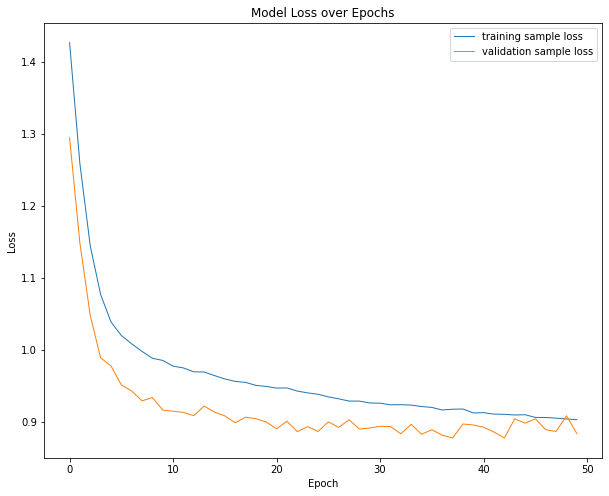

In [147]:
learningCurve(history)

In [154]:
def makeRoc(features_val, labels_val, labels, model, outputDir='', outputSuffix=''):
    from sklearn.metrics import roc_curve, auc
    labels_pred = model.predict(features_val)
    df = pd.DataFrame()
    fpr = {}
    tpr = {}
    auc1 = {}
    plt.figure(figsize=(10,8))       
    for i, label in enumerate(labels):
        df[label] = labels_val[:,i]
        df[label + '_pred'] = labels_pred[:,i]
        fpr[label], tpr[label], threshold = roc_curve(df[label],df[label+'_pred'])
        auc1[label] = auc(fpr[label], tpr[label])
        plt.plot(fpr[label],tpr[label],label='%s tagger, AUC = %.1f%%'%(label.replace('j_',''),auc1[label]*100.))
    plt.plot([0, 1], [0, 1], lw=1, color='black', linestyle='--')
    #plt.semilogy()
    plt.xlabel("Background Efficiency")
    plt.ylabel("Signal Efficiency")
    plt.xlim([-0.05, 1.05])
    plt.ylim(0.001,1.05)
    plt.grid(True)
    plt.legend(loc='lower right')
    plt.figtext(0.25, 0.90,'Outer RNN ROC Curve',fontweight='bold', wrap=True, horizontalalignment='right', fontsize=14)
    #plt.figtext(0.35, 0.90,'preliminary', style='italic', wrap=True, horizontalalignment='center', fontsize=14) 
    #plt.savefig('%sROC_%s.pdf'%(outputDir, outputSuffix))
    return labels_pred

In [155]:
labels = ['j_g', 'j_q', 'j_w', 'j_z', 'j_t']


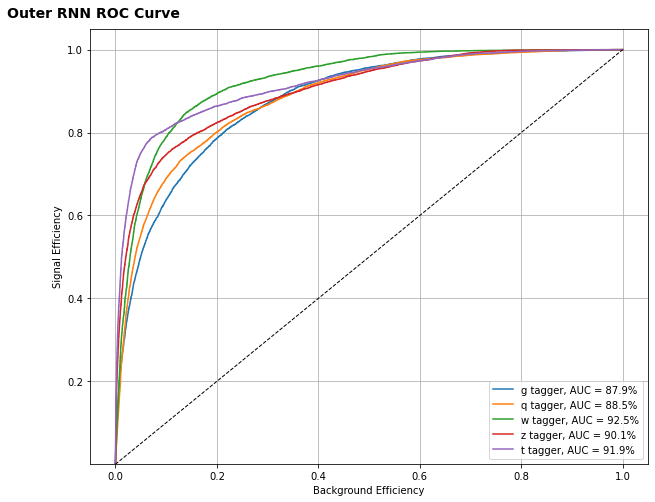

In [156]:
y_pred = makeRoc(X_test, y_test, labels, model, outputSuffix='two-layer')